In [24]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

from models.CNN_model import CNN
from models.CNN_SE_model import CNN_SE

In [25]:
MODEL_CNN_PATH = "saved-models/cnn.pt"
MODEL_CNN_SE_PATH = "saved-models/cnn-se.pt"

In [26]:
def view_kernels(kernels: torch.Tensor, output_file_name: str, ch=0, view_all_channels=False):
    out_channels, in_channels, *ksize = kernels.shape
    print(f"Out Channels: {out_channels}, In Channels: {in_channels}, Kernel Size: {ksize}")

    kernels = kernels - kernels.min()
    kernels = kernels / kernels.max()

    if view_all_channels:
        kernels = kernels.view(out_channels * in_channels, -1, ksize[0], ksize[1])
    elif in_channels != 3:
        #[out_channels, in_channels, kernel_width, kernel_height]
        kernels = kernels[:, ch, :, :].unsqueeze(dim=1)

    imgs = torchvision.utils.make_grid(kernels, padding=1, nrow=12)
    imgs = imgs.cpu()
    imgs = imgs.permute(1,2,0)
    fig_height, fig_width, fig_channels = imgs.shape
    print(f"Figure Height: {fig_height}, Figure Width: {fig_width}, Figure Channels: {fig_channels}")

    plt.figure(figsize=(12,(out_channels * in_channels) / 12))
    plt.axis("off")
    plt.imshow(imgs)
    plt.show()
    plt.savefig(output_file_name)



Out Channels: 16, In Channels: 3, Kernel Size: [12, 12]
Figure Height: 27, Figure Width: 157, Figure Channels: 3


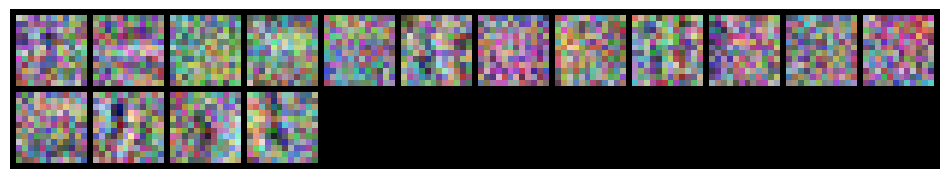

Out Channels: 32, In Channels: 16, Kernel Size: [8, 8]
Figure Height: 388, Figure Width: 109, Figure Channels: 3


<Figure size 640x480 with 0 Axes>

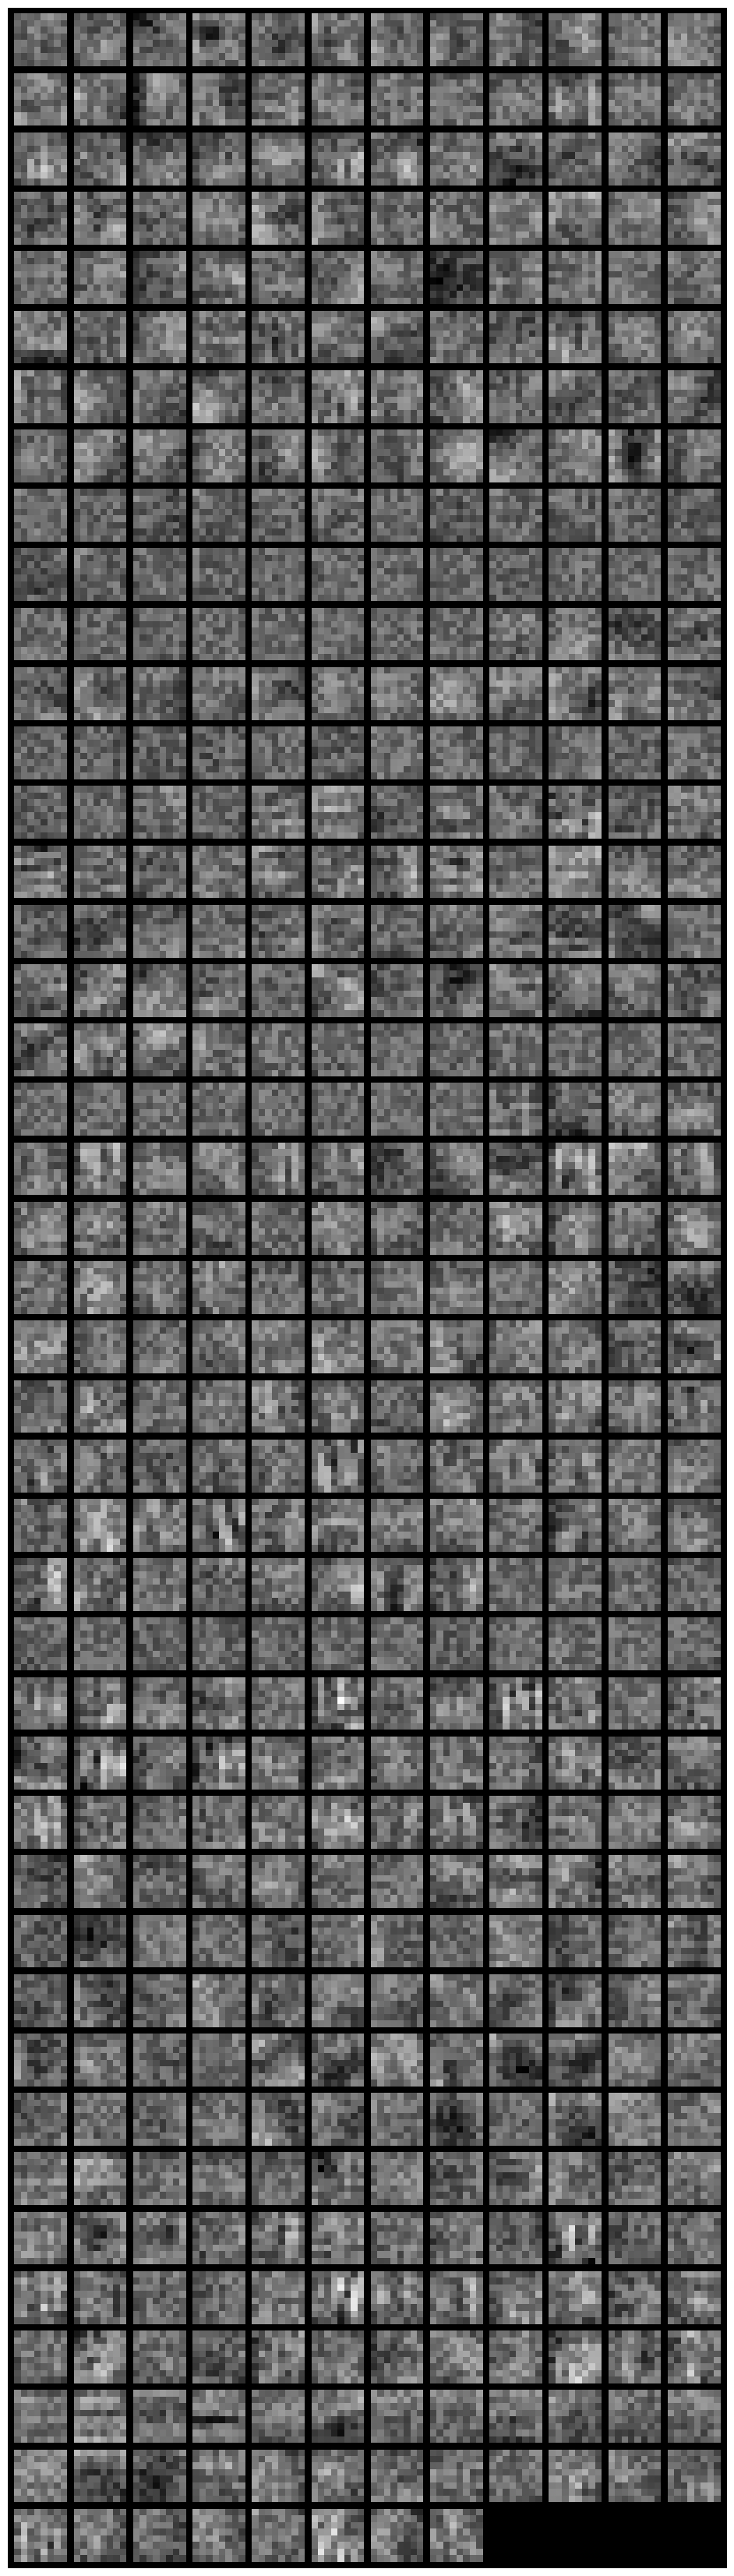

Out Channels: 64, In Channels: 32, Kernel Size: [4, 4]
Figure Height: 31, Figure Width: 61, Figure Channels: 3


<Figure size 640x480 with 0 Axes>

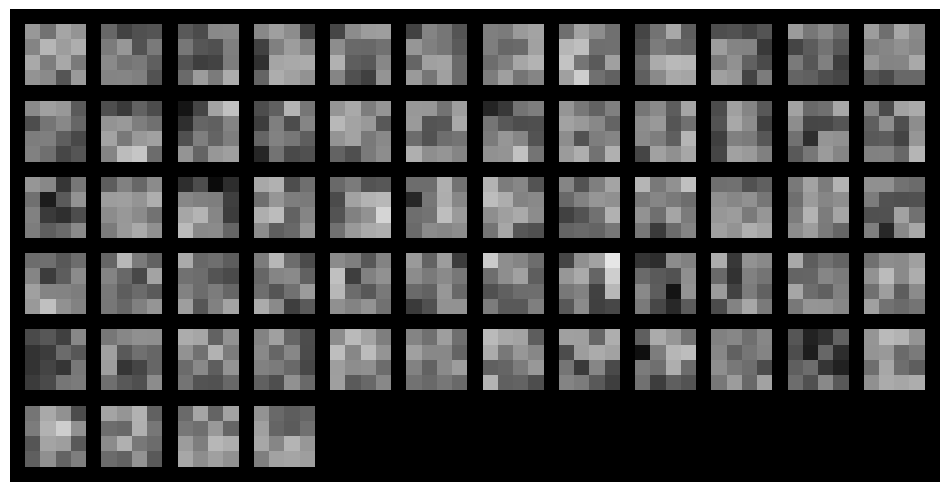

<Figure size 640x480 with 0 Axes>

In [27]:
model: CNN = torch.load(MODEL_CNN_PATH)
view_kernels(model.conv1.weight.detach().clone().cpu(), "CNN-layer1-kernel.png")
view_kernels(model.conv2.weight.detach().clone().cpu(), "CNN-layer2-kernel.png", view_all_channels=True)
view_kernels(model.conv3.weight.detach().clone().cpu(), "CNN-layer3-kernel.png")


Out Channels: 16, In Channels: 3, Kernel Size: [12, 12]
Figure Height: 27, Figure Width: 157, Figure Channels: 3


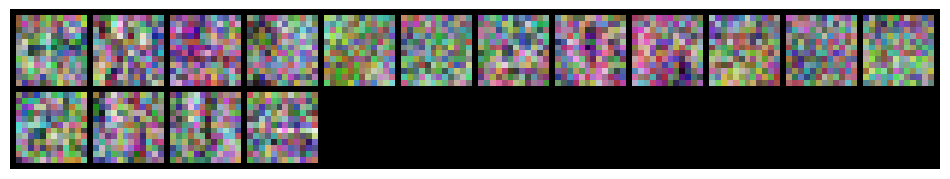

Out Channels: 32, In Channels: 16, Kernel Size: [8, 8]
Figure Height: 28, Figure Width: 109, Figure Channels: 3


<Figure size 640x480 with 0 Axes>

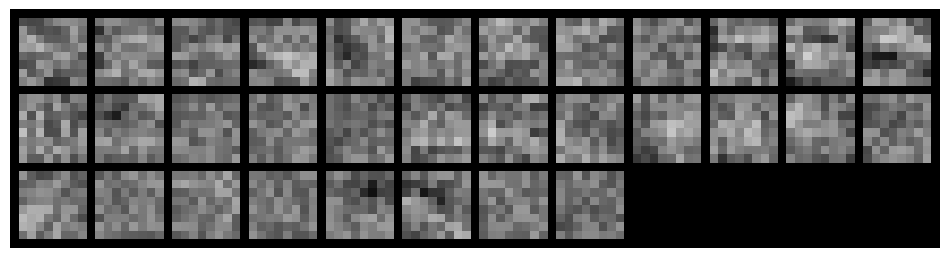

Out Channels: 64, In Channels: 32, Kernel Size: [4, 4]
Figure Height: 31, Figure Width: 61, Figure Channels: 3


<Figure size 640x480 with 0 Axes>

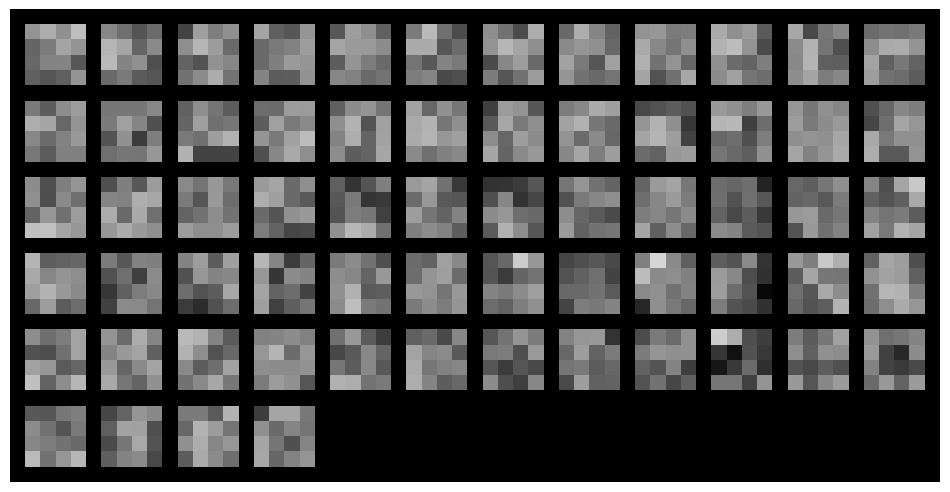

<Figure size 640x480 with 0 Axes>

In [28]:
model: CNN_SE = torch.load(MODEL_CNN_SE_PATH)
view_kernels(model.conv1.weight.detach().clone().cpu(), "CNNSE-layer1-kernel.png")
view_kernels(model.conv2.weight.detach().clone().cpu(), "CNNSE-layer2-kernel.png")
view_kernels(model.conv3.weight.detach().clone().cpu(), "CNNSE-layer3-kernel.png")